<a href="https://colab.research.google.com/github/van-dang/MRI-Cloud/blob/master/AdaptiveMidpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the code

In [0]:
# This program solves the Bloch-Torrey equation applied to computational diffusion MRI using 
# the finite element method coupled with the theta-method for the spatial discretization.

# The scope of usage: 
# (1) Single domains, Multilayered structures, manifolds
# (2) Membrane permeability for internal interfaces
#     Artificial permeability at the external interfaces
# (3) pure homogeneous Neumann BCs, (4) pseudo-periodic BCs

# Copyright (C) 2019 Van-Dang Nguyen (vdnguyen@kth.se)

# This file is part of DOLFIN.

# DOLFIN is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# DOLFIN is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.

# You should have received a copy of the GNU Lesser General Public License
# along with DOLFIN. If not, see <http://www.gnu.org/licenses/>.

# First added:  2017-10-10
# Last changed: 2019-04-25

# This demo is maintained by Van-Dang Nguyen
# Please report possible problems to vdnguyen@kth.se

# Setting a working environment with FEniCS

In [7]:
from google.colab import files

import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion

if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
    print("Python3 is needed!");
    print("How to fix: Runtime/Change_runtime_type/Python 3");
    sys.exit()
    
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    from dolfin import *; from mshr import *

gmsh_dir=!which gmsh
if len(gmsh_dir)==0:
  !apt-get install gmsh
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil

import sympy as sp


clear_output()

dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

# Disable warnings
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger("rothemain.rothe_utils")
logging.getLogger('UFL').setLevel(logging.WARNING)
logging.getLogger('FFC').setLevel(logging.WARNING)

import warnings
warnings.filterwarnings("ignore")


dolfin version: 2019.1.0


#Load pre-defined functions

In [0]:
import sympy as sp  
exists = os.path.isfile('DmriFemBuitInFunc.py')
isupdate = False
if (exists==False or isupdate==True):
    if isupdate==True:
        !rm DmriFemBuitInFunc.py
    print("Load pre-defined functions from GitHub")
    !wget --quiet https://raw.githubusercontent.com/van-dang/MRI-Cloud/master/DmriFemBuitInFunc.py
from DmriFemBuitInFunc import *

# Working on the mesh

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


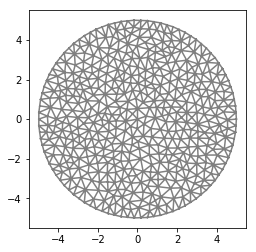

In [20]:
'''
geo_choice = 1
if geo_choice == 1:
    mesh_file = "fru_M_100383_1D.xml"
else:    
    mesh_file = "fru_M_100383_3D.xml"
mesh_file_exists = os.path.isfile(mesh_file)
if (mesh_file_exists==False):
    !wget https://github.com/van-dang/MRI-Cloud/raw/mesh/$mesh_file''.zip  
    !unzip -q $mesh_file''.zip
mymesh = Mesh(mesh_file);
'''

domain = Circle(Point(0,0), 5)
r = 15   # Resolution of mesh
mymesh = generate_mesh(domain, r)
plot(mymesh)


# Solve the Bloch-Torrey equation

Function Space for Single Domains has 2 components
(ur, ui): r-real, i-imaginary
Initialize a standard function space.
t:   0.00  T: 53700.00 dt: 200.0 qvalue: 4.742741e-05 Completed 0.00%
382.51618848592955
699.9214899812673
902.7033850331366
1035.4614614295697
1107.6282995422587
1148.096205838085
1175.611617221862
1197.720235716313
1217.1621920686996
1234.9941412452606
1251.6772063339492
1267.4395315685083
1282.4060561866493
1296.651537091865
1310.2254645246887
1323.1649927768358
1335.5019317791284
1347.2664637613586
1358.4889547326104
1369.2006465438308
1379.4337094462517
1389.220955583042
1398.595401466979
1407.5897941195717
1416.236167645815
1424.5654646783114
1432.607237350884
2064.6460751738996
2086.865235999725
2108.0597408846093
2128.283571351782
2147.5935533145625
2166.047972414678
2183.7053955386154
2200.623700539656
2216.859303237151
2232.4665663355318
2247.4973687048087
2262.000813287996
2276.0230512218723
2289.607200602847
2302.7933406720244
2315.6185642739156
2328.117073

DEBUG:matplotlib.axes._base:update_title_pos



140.67797798256592
140.69502490301932
140.71207563001164
140.72913015979958
140.74618849326865
140.76325062149746
140.7803165464709
7.781291568984037
10.999933107892042
140.72981452278265
Successfully Completed! Elapsed time: 189.099517 seconds
b: 10000.000, g: 0.177, q: 4.743e-05, Signal: 4.395e+01, Normalized signal: 5.612e-01, dt: 6.957, hmin: 3.483e-01, whole_vol: 78.306, vol_of_interest: 78.306, Free signal: 9.358e-14, elasped time 189.100 (s)

save to log.txt


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


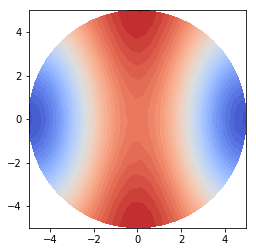

In [89]:
mri_simu = MRI_simulation()
mri_para = MRI_parameters()

bvalues = [10000]
signal_array=[];
voi_array=[];
whole_vol_array = [];

def compute_est(theta, u_L, u_H):
    """Return error estimate by Richardson extrapolation"""
    p = 2 if theta == 0.5 else 1
    est = sqrt(assemble((u_L - u_H)**2*dx)) / (2**p - 1)
    return est

def compute_new_dt(theta, est, tol, dt):
    """Return new time step"""
    p = 2 if theta == 0.5 else 1
    rho = 0.9
    dt_new = dt * ( rho * tol / est )**(1/p)
    return dt_new

def ThetaMethodF1(ft, ift, mri_para, mri_simu, w, v, mydomain):
    if (mydomain.IsDomainMultiple==True):
      if (mydomain.IsDomainPeriodic==True) and sum(mydomain.PeriodicDir)>0:
          F = ThetaMethodF_sBC2c(ft, ift, mri_para, w, v, mri_simu, mydomain)
      else:
          F = ThetaMethodF_wBC2c(ft, ift, mri_para, w, v, mri_simu, mydomain)
    else:
      if (mydomain.IsDomainPeriodic==True) and sum(mydomain.PeriodicDir)>0:
          F = ThetaMethodF_sBC1c(ft, ift, mri_para, w, v, mri_simu, mydomain)
      else:
          F = ThetaMethodF_wBC1c(ft, ift, mri_para, w, v, mri_simu, mydomain)
    return F  

def mid_point_single_step(tp, t, dt, w0):
    ft_prev = mri_para.time_profile(tp);
    ift_prev = mri_para.itime_profile(tp);
    ft = mri_para.time_profile(t);
    ift = mri_para.itime_profile(t);
    A = 1/dt*M + assemble(ThetaMethodF1(ft, ift, mri_para, mri_simu, w, v, mydomain))
    b = 1/dt*M*w0.vector() - assemble(ThetaMethodF1(ft_prev, ift_prev, mri_para, mri_simu, w0, v, mydomain))
    w1 =  Function(mydomain.W);
    linsolver.solve(A, w1.vector(),b);
    return w1

  
for bvalue in bvalues:
    #################################################################################
    #########################  Pre-defined parameters ###############################
    mri_para.stype='PGSE'                                # sequence type
    mri_para.bvalue = bvalue;                              # bvalue
    mri_para.delta, mri_para.Delta = 10600, 43100        # time sequence
    mri_para.set_gradient_dir(mymesh, 1, 0, 0)           # gradient direction

    mri_para.T = mri_para.Delta+mri_para.delta
    mri_para.fs_sym = sp.Piecewise(
                    (  1., mri_para.s < mri_para.delta ),
                    (  0., mri_para.s < mri_para.Delta ),
                    ( -1., mri_para.s < mri_para.T ),
                    (  0., True )  
                ) 


    mri_para.Apply()
    mri_simu.k = 200;                                    # time-step size
    mri_simu.nskip = 100;                                  # frequency to print ouputs
    mydomain = MyDomain(mymesh, mri_para)
    mydomain.phase = None
    mydomain.PeriodicDir = [0, 0, 0];             # Direction of the periodicity
    mydomain.IsDomainPeriodic = False             # Confirm if the mesh if periodic
    mydomain.IsDomainMultiple = False             # Confirm if the mesh is multiple
    ################################################################################
    mydomain.Apply()   # Call Apply before setting the diffusion tensor
    ################################################################################
    # Impose the diffusion coefficient
    mydomain.D0 = 3e-3
    mydomain.D = mydomain.D0;
    #################################################################################

    # linsolver = PETScLUSolver("mumps")
    linsolver = KrylovSolver("bicgstab")

    # mri_simu.solve(mydomain, mri_para, linsolver)

    mri_simu.Dirac_Delta, w0 = mri_simu.InitialCondition(mydomain, None)

    stepcounter = 0;

    M = MassMatrix(mydomain);

    mri_simu.t = 0;
    ft_prev  =  mri_para.time_profile(mri_simu.t);
    ift_prev = mri_para.itime_profile(mri_simu.t);

    v = TestFunction(mydomain.W); w = TrialFunction(mydomain.W);
        
    start_time = time.time()
  
    tp = mri_simu.t
    while mri_simu.t < mri_para.T + 2*mri_simu.k: # Time-stepping loop
        if stepcounter % mri_simu.nskip == 0:
            print('t: %6.2f '%mri_simu.t, 'T: %6.2f'%mri_para.T, 'dt: %.1f'%mri_simu.k,'qvalue: %e'%mri_para.qvalue,'Completed %3.2f%%'%(float(mri_simu.t)/float(mri_para.T+mri_simu.k)*100.0));
        
        u_low  = mid_point_single_step(tp, mri_simu.t, mri_simu.k,   w0);
        u_mid  = mid_point_single_step(tp, mri_simu.t + mri_simu.k/2, mri_simu.k/2, w0);
        u_high = mid_point_single_step(tp + mri_simu.k/2, mri_simu.t + mri_simu.k, mri_simu.k/2, u_mid);
        
        theta = 0.5
        tol = 1e-3
        est = compute_est(theta, u_low, u_high)
        dt_new = compute_new_dt(theta, est, tol, mri_simu.k)
        if est > tol:
            # mri_simu.k = min(dt_new, mri_para.T - mri_simu.t)
            mri_simu.k = dt_new
        else:                
            w0.vector()[:] = u_high.vector()[:]
            tp = mri_simu.t
            mri_simu.t += mri_simu.k;
            
        print(dt_new)
        stepcounter += 1;

    mri_simu.elapsed_time = time.time() - start_time
    print("Successfully Completed! Elapsed time: %f seconds"%mri_simu.elapsed_time)   
    
    # Post-processing
    one = Function(mydomain.V)
    one.vector()[:] = 1
    whole_vol = assemble(one*dx)
    voi = assemble(mri_simu.Dirac_Delta*dx)
    if mydomain.IsDomainMultiple == True:
        u0r_0, u0i_0, u1r_0, u1i_0 = split(w0)
        initial0 = assemble((1-mydomain.phase)*mri_simu.Dirac_Delta*dx);
        signal0 = assemble(((1-mydomain.phase)*u0r_0)*dx);
        initial1 = assemble(mydomain.phase*mri_simu.Dirac_Delta*dx)
        signal1 = assemble((mydomain.phase*u1r_0)*dx);
        signal = assemble((mydomain.phase*u1r_0+(1-mydomain.phase)*u0r_0)*dx);
        print('Signal on each compartment')
        print('Sum initial0: %.3e, Signal0: %.3e'%(initial0, signal0))
        print('Sum initial1: %.3e, Signal1: %.3e'%(initial1, signal1))
        out_text = 'b: %.3f, g: %.3f, q: %.3e, Signal: %.3e, Normalized signal: %.3e, kappa: %.3e, dt: %.3f, hmin: %.3f, whole_vol: %.3f, vol_of_interest: %.3f, Free signal: %.3e, elasped time %.3f (s)\n'%(mri_para.bvalue, mri_para.gvalue, mri_para.qvalue, signal, signal/voi, mydomain.kappa, mri_simu.k, mydomain.hmin, whole_vol, voi, exp(-mri_para.bvalue*mydomain.D0), mri_simu.elapsed_time)
        print(out_text)
        V0 = FunctionSpace(mydomain.mesh0, mydomain.Ve);
        V1 = FunctionSpace(mydomain.mesh1, mydomain.Ve);
        u0r_0p = project(u0r_0,V0)
        u1r_0p = project(u1r_0,V1)
        if mydomain.tdim==mydomain.gdim and not(plt==None):
            plt.figure(10000);
            plot(u0r_0p, cmap="coolwarm")
            plt.figure(10001);            
            plot(u1r_0p, cmap="coolwarm")  
        File("u0r.pvd")<<u0r_0p
        File("u1r.pvd")<<u1r_0p
    else:
        ur, ui = split(w0)
        signal = assemble(ur*dx);
        out_text = 'b: %.3f, g: %.3f, q: %.3e, Signal: %.3e, Normalized signal: %.3e, dt: %.3f, hmin: %.3e, whole_vol: %.3f, vol_of_interest: %.3f, Free signal: %.3e, elasped time %.3f (s)\n'%(mri_para.bvalue, mri_para.gvalue, mri_para.qvalue, signal, signal/voi, mri_simu.k, mydomain.hmin, whole_vol, voi, exp(-mri_para.bvalue*mydomain.D0), mri_simu.elapsed_time)
        print(out_text)
        V = FunctionSpace(mydomain.mymesh,mydomain.Ve);
        ur_p = project(ur,V)
        if mydomain.tdim==mydomain.gdim and not(plt==None): 
            plt.figure(10000);
            plot(ur_p, cmap="coolwarm")
        File("ur.pvd")<<ur_p
    signal_array.append(signal)
    voi_array.append(voi)
    whole_vol_array.append(whole_vol);
    
    comm = MPI.comm_world
    rank = comm.Get_rank()    
    
    print("save to log.txt")
    outfile = open('log.txt', 'a')
    if int(rank) == 0:
            outfile.write(out_text)
    outfile.close()  

In [0]:
import numpy as np
plt.plot(bvalues, np.divide(signal_array,signal_array[0]))
plt.xlabel('b (s/mm^2)')
plt.ylabel('S(b)/S(0)')